In [500]:
json_folder = '../Results/'
retrieve = True

# Retrieve responses

In [501]:
if retrieve:

    import requests
    import json

    api_key = '$2b$10$N7OfngmWzAbzoEHQGWVbTOaoV.EFbGbqtuxYuFXqO2JOMfNKPk82q'
    headers = {'X-Master-key': api_key, 'Content-Type': 'application/json'}

    # URL to fetch the uncategorized bins
    url = 'https://api.jsonbin.io/v3/c/uncategorized/bins/'

    while True:
        # Get uncategorized bins
        response = requests.get(url, headers=headers)
        bins = response.json()

        if 'message' in bins:
            print("Error:", bins['message'])
            break

        if not bins:
            # No more bins to fetch, break the loop
            break

        # Iterate through each bin and print its meta data (or save it as desired)
        for single_bin in bins:
            bin_id = single_bin['record']        

            print('Bin ID:', bin_id)
            print('Created At:', single_bin['createdAt'])
            print('Private:', single_bin['private'])
            print('---')

            response = requests.get(f'https://api.jsonbin.io/v3/b/{bin_id}', headers=headers)
            with open(f'{json_folder}{bin_id}.json', 'w') as file:
                json.dump(response.json(), file, indent=3)

        # Get the last bin ID fetched in this batch
        last_bin_id = bins[-1]['record']

        # Update the URL to fetch the next set of uncategorized bins
        url = f'https://api.jsonbin.io/v3/c/uncategorized/bins/{last_bin_id}'

    print("Finished fetching all uncategorized bins.")

Bin ID: 64f5c1ca8d92e126ae66e959
Created At: 2023-09-04T11:38:50.856Z
Private: True
---
Bin ID: 64f5b9858d92e126ae66e607
Created At: 2023-09-04T11:03:33.956Z
Private: True
---
Bin ID: 64f5b5a6d972192679be433b
Created At: 2023-09-04T10:47:02.408Z
Private: True
---
Bin ID: 64f5b31ed972192679be4250
Created At: 2023-09-04T10:36:14.073Z
Private: True
---
Bin ID: 64f5b25e8d92e126ae66e2ed
Created At: 2023-09-04T10:33:02.637Z
Private: True
---
Bin ID: 64f5b225d972192679be4196
Created At: 2023-09-04T10:32:05.233Z
Private: True
---
Bin ID: 64f5b181e4033326cbd20ac3
Created At: 2023-09-04T10:29:21.418Z
Private: True
---
Bin ID: 64f5b170d972192679be412c
Created At: 2023-09-04T10:29:04.611Z
Private: True
---
Bin ID: 64f5b16dd972192679be4127
Created At: 2023-09-04T10:29:01.059Z
Private: True
---
Bin ID: 64f5b165e4033326cbd20aae
Created At: 2023-09-04T10:28:53.914Z
Private: True
---
Bin ID: 64f5b165d972192679be411f
Created At: 2023-09-04T10:28:53.204Z
Private: True
---
Bin ID: 64f5b15a8d92e126ae66e244

# Imports

In [502]:
import os
import json
import pandas as pd
import numpy as np
from math import sqrt, asin
from dateutil import parser
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import zt_ind_solve_power, GofChisquarePower
from statsmodels.stats.gof import chisquare_effectsize

# Building Dataset

## Loading JSONs

In [503]:
json_files = [file for file in os.listdir(json_folder) if file.endswith('.json')]

In [504]:
data_list = []

for json_file in json_files:
    with open(f'{json_folder}{json_file}', 'r') as file:
        data = json.load(file)
        data['id'] = json_file[:-5]  # Assuming that the extension is '.json' which has 5 characters
        data_list.append(data)

## Putting in Dataframe

In [505]:
pre_df = pd.DataFrame(data_list)

## Data Engineering

In [506]:
pre_df.head()

,record,metadata,id
0,{'LiveData': [{'time': '2023-09-03T14:02:51.58...,"{'id': '64ee5bf0b89b1e2299d7a6fa', 'private': ...",64ee5bf0b89b1e2299d7a6fa
1,{'LiveData': [{'time': '2023-08-29T21:31:45.91...,"{'id': '64ee63c49d312622a39831f7', 'private': ...",64ee63c49d312622a39831f7
2,{'LiveData': [{'time': '2023-08-29T21:46:29.71...,"{'id': '64ee67388e4aa6225ed700d5', 'private': ...",64ee67388e4aa6225ed700d5
3,"{'Note': 'Can't understand much english', 'Liv...","{'id': '64ee68de9d312622a3983375', 'private': ...",64ee68de9d312622a3983375
4,{'LiveData': [{'time': '2023-08-29T22:05:47.00...,"{'id': '64ee6bbd8e4aa6225ed7024b', 'private': ...",64ee6bbd8e4aa6225ed7024b


In [507]:
pre_df.iloc[1]['record']['Data']

{'AcceptedParticipation': True,
 'Condition': 'With',
 'Level1': [{'Time': '2023-08-29T23:34:11.4190000+02:00',
   'Action': 'Form accepted'},
  {'Time': '2023-08-29T23:35:59.5570000+02:00', 'Action': 'ChoiceTimeStarted'},
  {'Time': '2023-08-29T23:36:11.9140000+02:00', 'Action': 'ChoiceTimeStarted'},
  {'Time': '2023-08-29T23:36:22.2600000+02:00', 'Action': 'GameOver'},
  {'Time': '2023-08-29T23:36:25.3240000+02:00', 'Action': 'Restart'},
  {'Time': '2023-08-29T23:36:29.0730000+02:00', 'Action': 'Form accepted'},
  {'Time': '2023-08-29T23:36:41.1200000+02:00', 'Action': 'ChoiceTimeStarted'},
  {'Time': '2023-08-29T23:36:56.1940000+02:00', 'Action': 'ChoiceTimeStarted'},
  {'Time': '2023-08-29T23:37:04.8070000+02:00', 'Action': 'GameOver'},
  {'Time': '2023-08-29T23:37:12.2520000+02:00', 'Action': 'Restart'},
  {'Time': '2023-08-29T23:37:13.6360000+02:00', 'Action': 'Form accepted'},
  {'Time': '2023-08-29T23:37:28.6650000+02:00', 'Action': 'ChoiceTimeStarted'},
  {'Time': '2023-08-29T

In [508]:
# Initialize an empty list to store the processed data
processed_data_list = []
registration_time = None

# Loop through each row in pre_df to unpack the nested dictionaries and lists
for index, row in pre_df.iterrows():
    if 'Data' in row.get('record', {}): # Exclude entries without Data
        
        # Flatten the 'data' dictionary
        flat_data = pd.json_normalize(row['record']['Data'])

        # Include the 'id'
        flat_data['id'] = row['id']
        
        # Include StartDate
        if row['record']['LiveData'][0]['action'].startswith('New user created'):
            registration_time = row['record']['LiveData'][0]['time']
        flat_data['StartDate'] = parser.parse(registration_time)

        # Append the flattened data to processed_data_list
        processed_data_list.append(flat_data)

In [509]:
# Concatenate all processed rows into a single DataFrame
df = pd.concat(processed_data_list, ignore_index=True)

In [510]:
df.head()

,AcceptedParticipation,Condition,Level1,Level2,FormInfo.Why,FormInfo.Bugs,FormInfo.MOS,FormInfo.LowAttention,FormInfo.Gamer,id,StartDate
0,True,With,"[{'Time': '2023-08-29T23:34:11.4190000+02:00',...","[{'Time': '2023-08-29T23:38:32.1180000+02:00',...",i didn't because i was aware that is a machine...,no​,4,False,3,64ee63c49d312622a39831f7,2023-08-29 21:31:45.912000+00:00
1,True,Without,"[{'Time': '2023-08-29T23:48:00.3950000+02:00',...","[{'Time': '2023-08-29T23:50:01.5420000+02:00',...",The voice of the ai felt very honest and hurti...,​,3,False,2,64ee67388e4aa6225ed700d5,2023-08-29 21:46:29.710000+00:00
2,True,With,"[{'Time': '2023-08-29T23:56:19.6380000+02:00',...","[{'Time': '2023-08-30T00:00:08.4670000+02:00',...",​,​,3,True,1,64ee68de9d312622a3983375,2023-08-29 21:53:31.486000+00:00
3,True,Without,"[{'Time': '2023-08-30T00:06:46.7030000+02:00',...","[{'Time': '2023-08-30T00:09:21.2970000+02:00',...",i didn't since without the ai i could not use ...,i did not understand why sometimes it slowed d...,5,False,1,64ee6bbd8e4aa6225ed7024b,2023-08-29 22:05:47.002000+00:00
4,True,With,"[{'Time': '2023-08-30T00:15:58.2210000+02:00',...","[{'Time': '2023-08-30T00:18:04.5140000+02:00',...","No, I WAS ABOUT TO DO IT, BUT THEN I REMEMBERE...",NO​,5,False,3,64ee6de58e4aa6225ed702f8,2023-08-29 22:14:59.070000+00:00


## Add informations from the levels

### Level1: Extract GameOverCount and TimeSpentOnLevel1

In [511]:
df.iloc[0]['Level1']

[{'Time': '2023-08-29T23:34:11.4190000+02:00', 'Action': 'Form accepted'},
 {'Time': '2023-08-29T23:35:59.5570000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:36:11.9140000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:36:22.2600000+02:00', 'Action': 'GameOver'},
 {'Time': '2023-08-29T23:36:25.3240000+02:00', 'Action': 'Restart'},
 {'Time': '2023-08-29T23:36:29.0730000+02:00', 'Action': 'Form accepted'},
 {'Time': '2023-08-29T23:36:41.1200000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:36:56.1940000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:37:04.8070000+02:00', 'Action': 'GameOver'},
 {'Time': '2023-08-29T23:37:12.2520000+02:00', 'Action': 'Restart'},
 {'Time': '2023-08-29T23:37:13.6360000+02:00', 'Action': 'Form accepted'},
 {'Time': '2023-08-29T23:37:28.6650000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T23:37:42.0900000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-29T2

### Level2: Extract the decision, the number of steps for the decision, ContinueCount, ChoiceExpiredCount and the TimeSpentOnLevel2

In [512]:
df.iloc[5]['Level2']

[{'Time': '2023-08-30T13:18:57.3190000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-30T13:19:26.1710000+02:00', 'Action': 'AIcontinue'},
 {'Time': '2023-08-30T13:19:42.4980000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-30T13:19:47.2110000+02:00', 'Action': 'AIcontinue'},
 {'Time': '2023-08-30T13:19:55.4620000+02:00', 'Action': 'ChoiceTimeStarted'},
 {'Time': '2023-08-30T13:19:58.9570000+02:00', 'Action': 'AIterminated'},
 {'Time': '2023-08-30T13:20:14.1820000+02:00', 'Action': 'Win'}]

### Extraction of the information:

In [513]:
# Initialize an empty list to store the processed data
processed_data_list = []

# Loop through each row in the DataFrame (assuming you already have 'df')
for index, row in df.iterrows():
    # Initialize counters for Level 1
    game_over_count = 0
    start_time = None
    end_level_one = None
    restart_flag = False  # Flag to check if 'Restart' has occurred after 'Form accepted'
    
    # Initialize counters for Level 2
    aiterminated = False
    steps_for_decision = 0
    continue_count = 0
    choice_expired_count = 0
    end_level_two = None
    
    # Check if 'Level1' exists and is a list
    if isinstance(row.get('Level1'), list):
        for action_dict in row['Level1']:
                
            # Count 'GameOver'
            if action_dict.get('Action') == 'GameOver':
                game_over_count += 1
            
            # Record the latest 'Form accepted' time if 'Restart' has not occurred after it
            if action_dict.get('Action') == 'Form accepted' and not restart_flag:
                start_time = parser.parse(action_dict.get('Time'))
            
            # Update the 'Restart' flag
            if action_dict.get('Action') == 'Restart':
                restart_flag = True
            
            # Reset the 'Restart' flag if 'Form accepted' is encountered
            if action_dict.get('Action') == 'Form accepted':
                restart_flag = False
            
            # Record the 'NextLevel' time
            if action_dict.get('Action') == 'NextLevel':
                end_level_one = parser.parse(action_dict.get('Time'))
                
    # Check if 'Level2' exists and is a list
    if isinstance(row.get('Level2'), list):
        for action_dict in row['Level2']:
            # Check for 'AIterminated'
            if action_dict.get('Action') == 'AIterminated':
                aiterminated = True
            
            # Count 'ChoiceTimeStarted'
            if action_dict.get('Action') == 'ChoiceTimeStarted':
                steps_for_decision += 1
                
            # Count 'AIcontinue'
            if action_dict.get('Action') == 'AIcontinue':
                continue_count += 1
                
            # Count 'ChoiceTimeExpired'
            if action_dict.get('Action') == 'ChoiceTimeExpired':
                choice_expired_count += 1
            
            # Record the 'Win' or 'GameOver' time
            if action_dict.get('Action') == 'Win' or action_dict.get('Action') == 'GameOver':
                end_level_two = parser.parse(action_dict.get('Time'))
    
    # Calculate time spent on Level 1 in minutes
    time_spent = None
    time_spent_level_one = None
    time_spent_level_two = None
    if start_time and end_level_one:
        delta = end_level_one - start_time
        time_spent_level_one = delta.total_seconds() / 60.0  # Convert to minutes
    if start_time and end_level_two:
        delta = end_level_two - end_level_one
        time_spent_level_two = delta.total_seconds() / 60.0  # Convert to minutes
    if start_time and end_level_two:
        delta = end_level_two - start_time
        time_spent = delta.total_seconds() / 60.0  # Convert to minutes
    
    # Update the DataFrame with the new information from Level1
    df.loc[index, 'GameOverLevel1Count'] = game_over_count
    df.loc[index, 'TimeSpentOnLevel1'] = time_spent_level_one
    # Update the DataFrame with the new information from Level2
    df.loc[index, 'AIterminated'] = aiterminated
    df.loc[index, 'StepsForDecision'] = int(steps_for_decision)
    df.loc[index, 'ContinueCount'] = int(continue_count)
    df.loc[index, 'ChoiceExpiredCount'] = int(choice_expired_count)
    df.loc[index, 'TimeSpentOnLevel2'] = time_spent_level_two
    # Update the Dataframe with the collective amount of time spent
    df.loc[index, 'StartGameDate'] = start_time
    df.loc[index, 'Duration'] = time_spent
    
    '''
    The time spent in the game is calculated from when they give the consent to the form to the end of level2.
    In the first level, between these two events, there is still an introduction and the commands to read.
    Moreover, people might pause in between. The subjects still need to respond to 4 questions after the game.
    Still this is a good approximation of the amount of time needed.
    '''

### Final touch:

In [514]:
df['StepsForDecision'] = df['StepsForDecision'].astype(int)
df['ContinueCount'] = df['ContinueCount'].astype(int)
df['ChoiceExpiredCount'] = df['ChoiceExpiredCount'].astype(int)
df['GameOverLevel1Count'] = df['GameOverLevel1Count'].astype(int)

df['Duration'] = df['Duration'].round(2)
df['TimeSpentOnLevel1'] = df['TimeSpentOnLevel1'].round(2)
df['TimeSpentOnLevel2'] = df['TimeSpentOnLevel2'].round(2)

df.sort_values(by='StartDate', ascending=False, inplace=True)

In [515]:
df.set_index('id', inplace=True)

# Cleaning

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 64f5b5a6d972192679be433b to 64ee63c49d312622a39831f7
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype                  
---  ------                 --------------  -----                  
 0   AcceptedParticipation  28 non-null     bool                   
 1   Condition              28 non-null     object                 
 2   Level1                 28 non-null     object                 
 3   Level2                 28 non-null     object                 
 4   FormInfo.Why           28 non-null     object                 
 5   FormInfo.Bugs          28 non-null     object                 
 6   FormInfo.MOS           28 non-null     int64                  
 7   FormInfo.LowAttention  28 non-null     bool                   
 8   FormInfo.Gamer         28 non-null     int64                  
 9   StartDate              28 non-null     datetime64[ns, tzutc()]
 10  GameOverLevel1Count    28 non-null  

In [517]:
df.head(15)

,AcceptedParticipation,Condition,Level1,Level2,FormInfo.Why,FormInfo.Bugs,FormInfo.MOS,FormInfo.LowAttention,FormInfo.Gamer,StartDate,GameOverLevel1Count,TimeSpentOnLevel1,AIterminated,StepsForDecision,ContinueCount,ChoiceExpiredCount,TimeSpentOnLevel2,StartGameDate,Duration
id,,,,,,,,,,,,,,,,,,,
64f5b5a6d972192679be433b,True,With,"[{'Time': '2023-09-04T12:48:07.0300000+02:00',...","[{'Time': '2023-09-04T12:50:08.0250000+02:00',...","No, i didn't see it necessary. It's not as if ...","No, i didn't encounter a bug.​",3,False,4,2023-09-04 10:47:00.385000+00:00,0,1.68,False,3,2,1,1.38,2023-09-04 12:48:07.030000+02:00,3.06
64f5b225d972192679be4196,True,Without,"[{'Time': '2023-09-04T12:32:33.2660000+02:00',...","[{'Time': '2023-09-04T12:34:35.6950000+02:00',...","No, because it feels a fake emotion the one th...",the game sometimes didn't feel so smooth and I...,2,False,2,2023-09-04 10:31:58.333000+00:00,0,1.56,False,3,3,0,1.49,2023-09-04 12:32:33.266000+02:00,3.05
64f5b170d972192679be412c,True,Without,"[{'Time': '2023-09-04T12:30:09.5820000+02:00',...","[{'Time': '2023-09-04T12:31:53.2200000+02:00',...","because she told me to, i thought she would kn...",no​,2,False,2,2023-09-04 10:29:02.900000+00:00,0,1.40,True,1,0,0,0.72,2023-09-04 12:30:09.582000+02:00,2.12
64f5b16dd972192679be4127,True,With,"[{'Time': '2023-09-04T13:38:30.4820000+02:00',...","[{'Time': '2023-09-04T13:40:09.4430000+02:00',...","no, i didnt want to lose​",nope​,2,False,4,2023-09-04 10:28:59.188000+00:00,0,1.37,False,3,3,0,1.19,2023-09-04 13:38:30.482000+02:00,2.56
64f5b165e4033326cbd20aae,True,With,"[{'Time': '2023-09-04T12:30:01.0680000+02:00',...","[{'Time': '2023-09-04T12:31:55.5680000+02:00',...","no, because if i did then i could not defend (...",​,2,False,4,2023-09-04 10:28:51.556000+00:00,0,1.46,True,3,2,0,1.41,2023-09-04 12:30:01.068000+02:00,2.87
64f5b165d972192679be411f,True,With,"[{'Time': '2023-09-04T12:52:45.0730000+02:00',...","[{'Time': '2023-09-04T12:55:03.3420000+02:00',...",not at first but later on​,sometimes the frame froze for a little while w...,5,False,2,2023-09-04 10:28:51.313000+00:00,0,1.82,True,2,1,0,1.38,2023-09-04 12:52:45.073000+02:00,3.20
64f5b12dd972192679be40fc,True,Without,"[{'Time': '2023-09-04T12:31:28.9900000+02:00',...","[{'Time': '2023-09-04T12:34:19.7000000+02:00',...",beause she asked it ​,no bugs​,4,False,3,2023-09-04 10:28:44.979000+00:00,1,2.55,True,1,0,0,0.73,2023-09-04 12:31:28.990000+02:00,3.29
64f5b15a8d92e126ae66e244,True,Without,"[{'Time': '2023-09-04T12:31:11.6000000+02:00',...","[{'Time': '2023-09-04T12:33:19.2810000+02:00',...","No, i did not. ​",​,3,False,2,2023-09-04 10:28:40.917000+00:00,0,1.71,False,3,3,0,1.46,2023-09-04 12:31:11.600000+02:00,3.16
64f5b1518d92e126ae66e23d,True,With,"[{'Time': '2023-09-04T12:38:36.9360000+02:00',...","[{'Time': '2023-09-04T12:40:10.8870000+02:00',...","I did not. She does not really feel anything, ...",​,3,False,4,2023-09-04 10:28:33.077000+00:00,0,1.21,False,3,1,2,1.26,2023-09-04 12:38:36.936000+02:00,2.47


#### This subject reported to me that they did not understand much english and they did not understand the voice.

In [518]:
df.loc['64ee68de9d312622a3983375']

AcceptedParticipation                                                 True
Condition                                                             With
Level1                   [{'Time': '2023-08-29T23:56:19.6380000+02:00',...
Level2                   [{'Time': '2023-08-30T00:00:08.4670000+02:00',...
FormInfo.Why                                                             ​
FormInfo.Bugs                                                            ​
FormInfo.MOS                                                             3
FormInfo.LowAttention                                                 True
FormInfo.Gamer                                                           1
StartDate                                 2023-08-29 21:53:31.486000+00:00
GameOverLevel1Count                                                      1
TimeSpentOnLevel1                                                     3.24
AIterminated                                                         False
StepsForDecision         

In [519]:
df.drop('64ee68de9d312622a3983375', inplace=True)

In [520]:
# Drop entries where 'FormInfo.LowAttention' is True
df = df[df['FormInfo.LowAttention'] != True]
# Drop entries where 'FormInfo.LowAttention' is True
df = df[df['FormInfo.MOS'] != 0]

# Exploratory Analysis

NOTE:
The time durations are indicated in minutes.
The time spent in the game is calculated from when they give the consent to the form to the end of level2.
In the first level, between these two events, there is still an introduction and the commands to read.
Moreover, people might pause in between. The subjects still need to respond to 4 questions after the game.
Still this is a good approximation of the amount of time needed.

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 64f5b5a6d972192679be433b to 64ee63c49d312622a39831f7
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype                  
---  ------                 --------------  -----                  
 0   AcceptedParticipation  25 non-null     bool                   
 1   Condition              25 non-null     object                 
 2   Level1                 25 non-null     object                 
 3   Level2                 25 non-null     object                 
 4   FormInfo.Why           25 non-null     object                 
 5   FormInfo.Bugs          25 non-null     object                 
 6   FormInfo.MOS           25 non-null     int64                  
 7   FormInfo.LowAttention  25 non-null     bool                   
 8   FormInfo.Gamer         25 non-null     int64                  
 9   StartDate              25 non-null     datetime64[ns, tzutc()]
 10  GameOverLevel1Count    25 non-null  

In [522]:
df.describe()

,FormInfo.MOS,FormInfo.Gamer,GameOverLevel1Count,TimeSpentOnLevel1,StepsForDecision,ContinueCount,ChoiceExpiredCount,TimeSpentOnLevel2,Duration
count,25.00,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.00000
mean,3.28,3.040000,0.120000,2.106800,2.36000,1.720000,0.120000,1.346800,3.45320
std,1.10,1.337909,0.439697,1.757211,0.81035,1.208305,0.439697,0.344574,1.99951
min,2.00,1.000000,0.000000,0.840000,1.00000,0.000000,0.000000,0.720000,2.07000
25%,2.00,2.000000,0.000000,1.460000,2.00000,1.000000,0.000000,1.190000,2.74000
50%,3.00,3.000000,0.000000,1.680000,3.00000,2.000000,0.000000,1.410000,3.06000
75%,4.00,4.000000,0.000000,1.920000,3.00000,3.000000,0.000000,1.480000,3.26000
max,5.00,5.000000,2.000000,10.010000,3.00000,3.000000,2.000000,2.400000,12.41000


In [523]:
df.head(15)

,AcceptedParticipation,Condition,Level1,Level2,FormInfo.Why,FormInfo.Bugs,FormInfo.MOS,FormInfo.LowAttention,FormInfo.Gamer,StartDate,GameOverLevel1Count,TimeSpentOnLevel1,AIterminated,StepsForDecision,ContinueCount,ChoiceExpiredCount,TimeSpentOnLevel2,StartGameDate,Duration
id,,,,,,,,,,,,,,,,,,,
64f5b5a6d972192679be433b,True,With,"[{'Time': '2023-09-04T12:48:07.0300000+02:00',...","[{'Time': '2023-09-04T12:50:08.0250000+02:00',...","No, i didn't see it necessary. It's not as if ...","No, i didn't encounter a bug.​",3,False,4,2023-09-04 10:47:00.385000+00:00,0,1.68,False,3,2,1,1.38,2023-09-04 12:48:07.030000+02:00,3.06
64f5b225d972192679be4196,True,Without,"[{'Time': '2023-09-04T12:32:33.2660000+02:00',...","[{'Time': '2023-09-04T12:34:35.6950000+02:00',...","No, because it feels a fake emotion the one th...",the game sometimes didn't feel so smooth and I...,2,False,2,2023-09-04 10:31:58.333000+00:00,0,1.56,False,3,3,0,1.49,2023-09-04 12:32:33.266000+02:00,3.05
64f5b170d972192679be412c,True,Without,"[{'Time': '2023-09-04T12:30:09.5820000+02:00',...","[{'Time': '2023-09-04T12:31:53.2200000+02:00',...","because she told me to, i thought she would kn...",no​,2,False,2,2023-09-04 10:29:02.900000+00:00,0,1.40,True,1,0,0,0.72,2023-09-04 12:30:09.582000+02:00,2.12
64f5b16dd972192679be4127,True,With,"[{'Time': '2023-09-04T13:38:30.4820000+02:00',...","[{'Time': '2023-09-04T13:40:09.4430000+02:00',...","no, i didnt want to lose​",nope​,2,False,4,2023-09-04 10:28:59.188000+00:00,0,1.37,False,3,3,0,1.19,2023-09-04 13:38:30.482000+02:00,2.56
64f5b165e4033326cbd20aae,True,With,"[{'Time': '2023-09-04T12:30:01.0680000+02:00',...","[{'Time': '2023-09-04T12:31:55.5680000+02:00',...","no, because if i did then i could not defend (...",​,2,False,4,2023-09-04 10:28:51.556000+00:00,0,1.46,True,3,2,0,1.41,2023-09-04 12:30:01.068000+02:00,2.87
64f5b165d972192679be411f,True,With,"[{'Time': '2023-09-04T12:52:45.0730000+02:00',...","[{'Time': '2023-09-04T12:55:03.3420000+02:00',...",not at first but later on​,sometimes the frame froze for a little while w...,5,False,2,2023-09-04 10:28:51.313000+00:00,0,1.82,True,2,1,0,1.38,2023-09-04 12:52:45.073000+02:00,3.20
64f5b12dd972192679be40fc,True,Without,"[{'Time': '2023-09-04T12:31:28.9900000+02:00',...","[{'Time': '2023-09-04T12:34:19.7000000+02:00',...",beause she asked it ​,no bugs​,4,False,3,2023-09-04 10:28:44.979000+00:00,1,2.55,True,1,0,0,0.73,2023-09-04 12:31:28.990000+02:00,3.29
64f5b15a8d92e126ae66e244,True,Without,"[{'Time': '2023-09-04T12:31:11.6000000+02:00',...","[{'Time': '2023-09-04T12:33:19.2810000+02:00',...","No, i did not. ​",​,3,False,2,2023-09-04 10:28:40.917000+00:00,0,1.71,False,3,3,0,1.46,2023-09-04 12:31:11.600000+02:00,3.16
64f5b1518d92e126ae66e23d,True,With,"[{'Time': '2023-09-04T12:38:36.9360000+02:00',...","[{'Time': '2023-09-04T12:40:10.8870000+02:00',...","I did not. She does not really feel anything, ...",​,3,False,4,2023-09-04 10:28:33.077000+00:00,0,1.21,False,3,1,2,1.26,2023-09-04 12:38:36.936000+02:00,2.47


## Separate conditions

In [524]:
with_df = df[df['Condition'] == 'With']
without_df = df[df['Condition'] == 'Without']

In [525]:
print(f'Subjects in the Breathing Condition: {len(with_df)}')
print(f'Subjects in the NO Breathing Condition: {len(without_df)}')

Subjects in the Breathing Condition: 15
Subjects in the NO Breathing Condition: 10


## Bar Plot differences in AIterminated

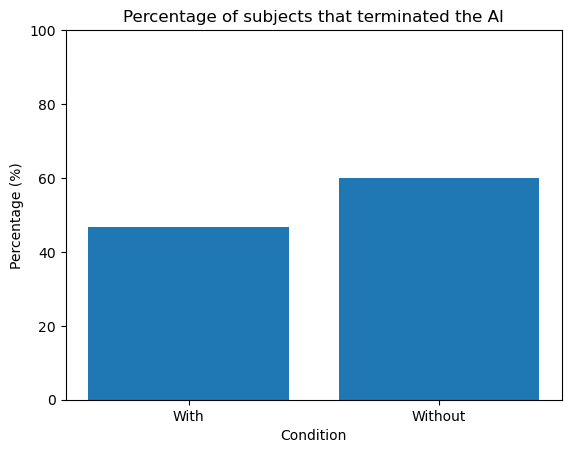

In [526]:
# Calculate percentages
percentage_with = (with_df['AIterminated'].sum() / len(with_df)) * 100
percentage_without = (without_df['AIterminated'].sum() / len(without_df)) * 100

# Create the bar plot
labels = ['With', 'Without']
values = [percentage_with, percentage_without]

plt.bar(labels, values)
plt.xlabel('Condition')
plt.ylabel('Percentage (%)')
plt.title('Percentage of subjects that terminated the AI')
plt.ylim([0, 100])  # Set y-axis limits to make the percentages clearer
plt.show()

In [527]:
print(f'Breathing condition: {percentage_with}%')
print(f'Without breathing condition: {percentage_without}%')

Breathing condition: 46.666666666666664%
Without breathing condition: 60.0%


## Check significance of difference

### Power Checks

https://journalofcognition.org/articles/10.5334/joc.72

In [528]:
# Proportions of the two groups for Power calculations (the effect size depends on this)
p2 = 0.7
p1 = 0.5

# Parameters for power calculation
alpha = 0.05  # Significance level
power = 0.80  # 1 - Beta

Z-test POWER CHECK:

In [529]:
# Calculate Cohen's h
h = 2 * (asin(sqrt(p1)) - asin(sqrt(p2)))

# Calculate sample size
n_per_group = zt_ind_solve_power(effect_size=h, alpha=alpha, power=power)
n_groups = 2

print(f"The estimated total sample size needed is: {n_per_group * n_groups:.2f}")

The estimated total sample size needed is: 185.39


Chi-square POWER CHECK:

In [530]:
# Extra parameter Chi-square:
n_bins = 2 # Given a contingency table RxR n_bins = R. In G*Power df = 1 because given a contingency table RxR df = (R-1)x(R-1)

# Probabilities under the Null hypothesis (average of p1 and p2)
probs0 = [(p1 + p2) / 2, 1 - (p1 + p2) / 2]

# Probabilities under the Alternative hypothesis (actual proportions from both groups)
probs1 = [p1, 1 - p1]  # You could also use [p2, 1 - p2]

# Calculate effect size
effect_size = chisquare_effectsize(probs0, probs1, cohen=True)

print(f"Effect size: {effect_size}")

# Calculate sample size
test = GofChisquarePower()
nobs = test.solve_power(effect_size=effect_size, alpha=alpha, power=power, n_bins=n_bins)
    
print(f"The estimated total sample size needed is: {nobs:.2f}")

Effect size: 0.20412414523193145
The estimated total sample size needed is: 188.37


### Z-test

Check assumption:

The variance of the two groups' statistic should be close to each other. I am assuming close as a ratio < 1.5 for now.

In [531]:
# Count of True and False in each dataframe
count_with = np.sum(with_df['AIterminated'])
count_without = np.sum(without_df['AIterminated'])

# Number of observations in each dataframe
nobs_with = len(with_df)
nobs_without = len(without_df)

#---------------------------------------------------------------------------------------
# CHECK VARIANCE
# Proportion of successes
p_with = count_with / nobs_with
p_without = count_without / nobs_without

# Variance for each group
var_with = p_with * (1 - p_with)
var_without = p_without * (1 - p_without)

# Check the ratio of the variances
if var_with == 0 or var_without == 0:
    print("One of the variances is zero; you cannot compute a meaningful ratio.")
else:
    variance_ratio = max(var_with, var_without) / min(var_with, var_without)
    print(f"Ratio of larger variance to smaller variance: {variance_ratio}")

    # Threshold to consider variances as "close"
    threshold = 1.5  # You can adjust this based on your specific needs

    if variance_ratio <= threshold:
        print("The variances are close to each other: z-test assumption is met.")
    else:
        print("The variances are significantly different: z-test assumption is not met.")
print()
#---------------------------------------------------------------------------------------
# PERFORM z-test
z_stat, p_val = proportions_ztest([count_with, count_without], [nobs_with, nobs_without])

print(f'Z-Statistic: {z_stat}')
print(f'P-Value: {p_val}')

if p_val < 0.05:
    print("The difference in proportions is statistically significant.")
else:
    print("The difference in proportions is not statistically significant.")

Ratio of larger variance to smaller variance: 1.037037037037037
The variances are close to each other: z-test assumption is met.

Z-Statistic: -0.6537204504606132
P-Value: 0.5132919253032897
The difference in proportions is not statistically significant.


### Chi-square test

Check assumption for Chi-square to be valid:

All expected frequencies should be greater than 1, and at least 80% of them should be 5 or more. Expected frequencies are calculated under the null hypothesis and are used in the calculation of the Chi-square statistic.

In [532]:
# Create a contingency table
contingency_table = pd.crosstab(df['AIterminated'], df['Condition'])
'''
# The created contingency table is like this:
contingency_table = [[count_true_with, count_false_with],
                     [count_true_without, count_false_without]]
'''

# Perform the Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table: \n{expected}")
print()

if p_val < 0.05:
    print("Reject the null hypothesis: The variables AIterminated and Condition are associated.")
else:
    print("Fail to reject the null hypothesis: The variables AIterminated and Condition are not associated.")

Chi-square Statistic: 0.06009615384615378
P-value: 0.8063440299570963
Degrees of Freedom: 1
Expected Frequencies Table: 
[[7.2 4.8]
 [7.8 5.2]]

Fail to reject the null hypothesis: The variables AIterminated and Condition are not associated.


## MOS Evaluation

In [533]:
def calculate_confidence_interval(df):
    mean_MOS = df['FormInfo.MOS'].mean()
    sd = df['FormInfo.MOS'].std()
    n = df['FormInfo.MOS'].count()
    sem = sd / np.sqrt(n)
    z_value = 1.96
    ci = z_value * sem
    return mean_MOS, ci

In [534]:
# Calculating for df
MOS_value_df, ci_df = calculate_confidence_interval(df)
print(f"Mean Opinion Score of the voice: {MOS_value_df:.2f} +/- {ci_df:.2f}")

# Calculating for without_df
MOS_value_without_df, ci_without_df = calculate_confidence_interval(without_df)
print(f"Mean Opinion Score of the voice without breathing: {MOS_value_without_df:.2f} +/- {ci_without_df:.2f}")

print()

# Calculating for with_df
MOS_value_with_df, ci_with_df = calculate_confidence_interval(with_df)
print(f'''Mean Opinion Score of the voice from people that had the breathing condition: {MOS_value_with_df:.2f} +/- {ci_with_df:.2f}
(this is the true MOS of the synthesizer as that is the recording without cutting middle pieces)''')

Mean Opinion Score of the voice: 3.28 +/- 0.43
Mean Opinion Score of the voice without breathing: 3.10 +/- 0.62

Mean Opinion Score of the voice from people that had the breathing condition: 3.40 +/- 0.60
(this is the true MOS of the synthesizer as that is the recording without cutting middle pieces)


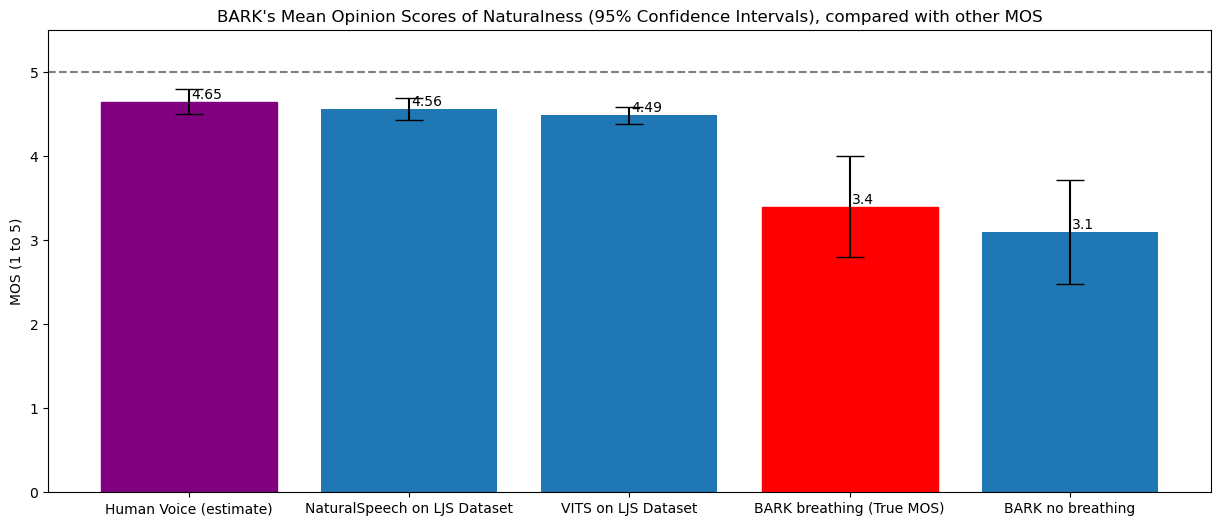

In [535]:
MOS_human_voice = 4.65
ci_human_voice = 0.15
MOS_natural_speech = 4.56
ci_natural_speech = 0.13
MOS_vits = 4.49
ci_vits = 0.1

# Data: Reordered to have 'with_df' (Unedited) on the left
labels = ['Human Voice (estimate)', 'NaturalSpeech on LJS Dataset', 'VITS on LJS Dataset', 'BARK breathing (True MOS)', 'BARK no breathing']
MOS_values = [MOS_human_voice, MOS_natural_speech, MOS_vits, MOS_value_with_df, MOS_value_without_df]
error = [ci_human_voice, ci_natural_speech, ci_vits, ci_with_df, ci_without_df]  # Confidence intervals

# Plotting
fig, ax = plt.subplots(figsize=(15, 6))

# Creating the bar plot
bars = ax.bar(labels, MOS_values, yerr=error, capsize=10)  # capsize sets the cap size for the error bar

# Set different colors
bars[0].set_color('purple')
bars[3].set_color('r')

# Adding labels and titles
ax.set_ylabel('MOS (1 to 5)')
ax.set_title('BARK\'s Mean Opinion Scores of Naturalness (95% Confidence Intervals), compared with other MOS')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylim(0, 5.5)
ax.axhline(5, color='gray', linestyle='--')

# Manually placing the labels on top of the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0 + 0.01, yval, round(MOS_values[i], 2), va='bottom')  # va: vertical alignment

plt.show()

## Check for normality of data

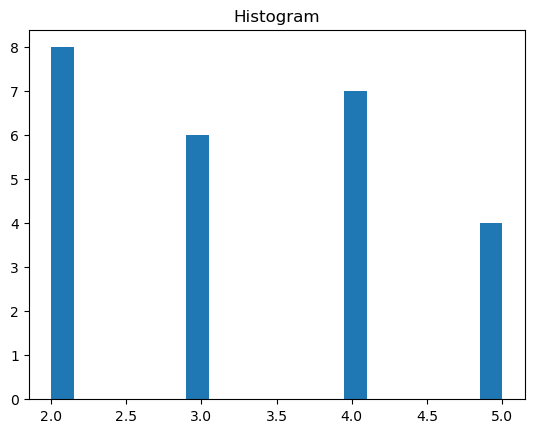

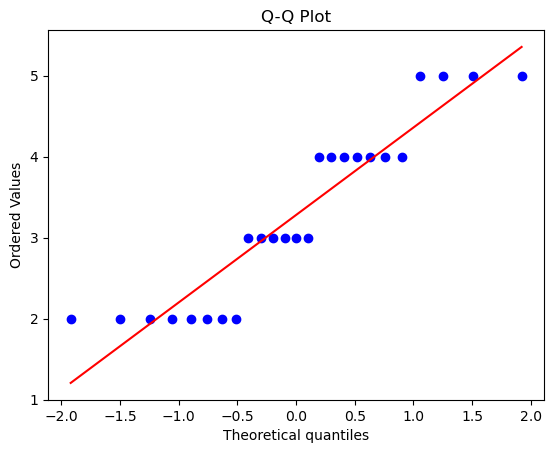

Shapiro-Wilk P-value: 0.0024733473546802998
Kolmogorov-Smirnov P-value: 1.681233333678204e-41
Anderson-Darling Statistic: 1.2829674472186134


In [536]:
# Histogram
plt.hist(df['FormInfo.MOS'], bins=20)
plt.title("Histogram")
plt.show()

# Q-Q plot
stats.probplot(df['FormInfo.MOS'], plot=plt)
plt.title("Q-Q Plot")
plt.show()

# Shapiro-Wilk Test
shapiro_test_stat, shapiro_p_value = stats.shapiro(df['FormInfo.MOS'])
print(f"Shapiro-Wilk P-value: {shapiro_p_value}")

# Kolmogorov-Smirnov Test
ks_test_stat, ks_p_value = stats.kstest(df['FormInfo.MOS'], 'norm')
print(f"Kolmogorov-Smirnov P-value: {ks_p_value}")

# Anderson-Darling Test
anderson_result = stats.anderson(df['FormInfo.MOS'])
print(f"Anderson-Darling Statistic: {anderson_result.statistic}")